<a href="https://colab.research.google.com/github/chintanrout/Basic-Projects-for-Data-sciences/blob/main/Coffee_shop_nutrientvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
import statsmodels.formula.api as smf


In [6]:
df = pd.read_csv('CoffeeShopMenu.csv')

In [4]:
pip install bioinfokit

     |████████████████████████████████| 82 kB 753 kB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-py3-none-any.whl size=56009 sha256=91cc7c50381b1e57a45e24776bc81afc31fc0ff5cb4967394125416de58d86d7
  Stored in directory: /root/.cache/pip/wheels/5d/f0/f9/3cfa74f39676f6745eeb99be64826173241a47808d2cb2f30f
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7095 sha256=c5f8cbb68159738f1586e0d069b64104c8193a41e5c15a17a3910a88a573c132
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [5]:
from bioinfokit.analys import stat

In [7]:
df.head()

,Category,Beverage,Size,Milk,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
0,Coffee,Brewed Coffee,Short,None,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,Coffee,Brewed Coffee,Tall,None,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,Coffee,Brewed Coffee,Grande,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
3,Coffee,Brewed Coffee,Venti,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
4,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0


In [8]:
df.shape

(238, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      238 non-null    object 
 1   Beverage      238 non-null    object 
 2   Size          238 non-null    object 
 3   Milk          238 non-null    object 
 4   Calories      238 non-null    int64  
 5   TotalFat      238 non-null    float64
 6   TransFat      238 non-null    float64
 7   SaturatedFat  238 non-null    float64
 8   Sodium        238 non-null    int64  
 9   TotalCarb     238 non-null    int64  
 10  Cholesterol   238 non-null    int64  
 11  DietaryFibre  238 non-null    int64  
 12  Sugars        238 non-null    int64  
 13  Protein       238 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 26.2+ KB


In [10]:
#As we can see from this there are no missing objects so we are good to move ahead

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,238.0,193.810924,103.668135,0.0,120.0,185.0,260.00,510.0
TotalFat,238.0,2.931933,2.956133,0.0,0.2,2.5,4.50,15.0
TransFat,238.0,1.318908,1.648097,0.0,0.1,0.5,2.00,9.0
SaturatedFat,238.0,0.037815,0.071737,0.0,0.0,0.0,0.10,0.3
Sodium,238.0,6.407563,8.679348,0.0,0.0,5.0,10.00,40.0
TotalCarb,238.0,128.067227,82.656396,0.0,70.0,120.0,170.00,340.0
Cholesterol,238.0,35.878151,20.927388,0.0,21.0,34.0,50.75,90.0
DietaryFibre,238.0,0.815126,1.455189,0.0,0.0,0.0,1.00,8.0
Sugars,238.0,32.819328,19.838082,0.0,18.0,32.0,43.75,84.0
Protein,238.0,7.032773,4.893173,0.0,3.0,6.0,10.00,20.0


In [12]:
#A good insight from the data that we can assume from here is that most of the numerical data is normally distributed. Excpet Dietery Fibre even TotalFat

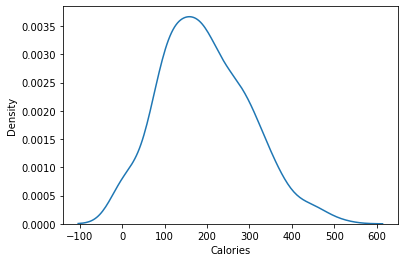

In [13]:
sns.kdeplot(df.Calories)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


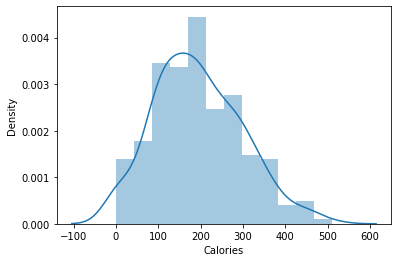

In [37]:
sns.distplot(df.Calories)

In [14]:
#As seen the calories graph is normally ditributed and doesn't seem to be skewed in anyway 

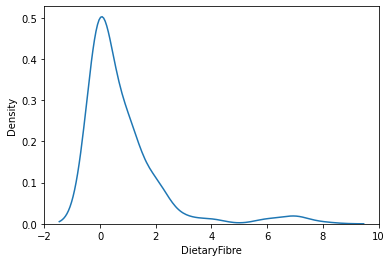

In [15]:
sns.kdeplot(df.DietaryFibre)

In [16]:
#This is the only numerical data that is extremely righ skewed. 

In [17]:
df.columns

Index(['Category', 'Beverage', 'Size', 'Milk', 'Calories', 'TotalFat',
       'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol',
       'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

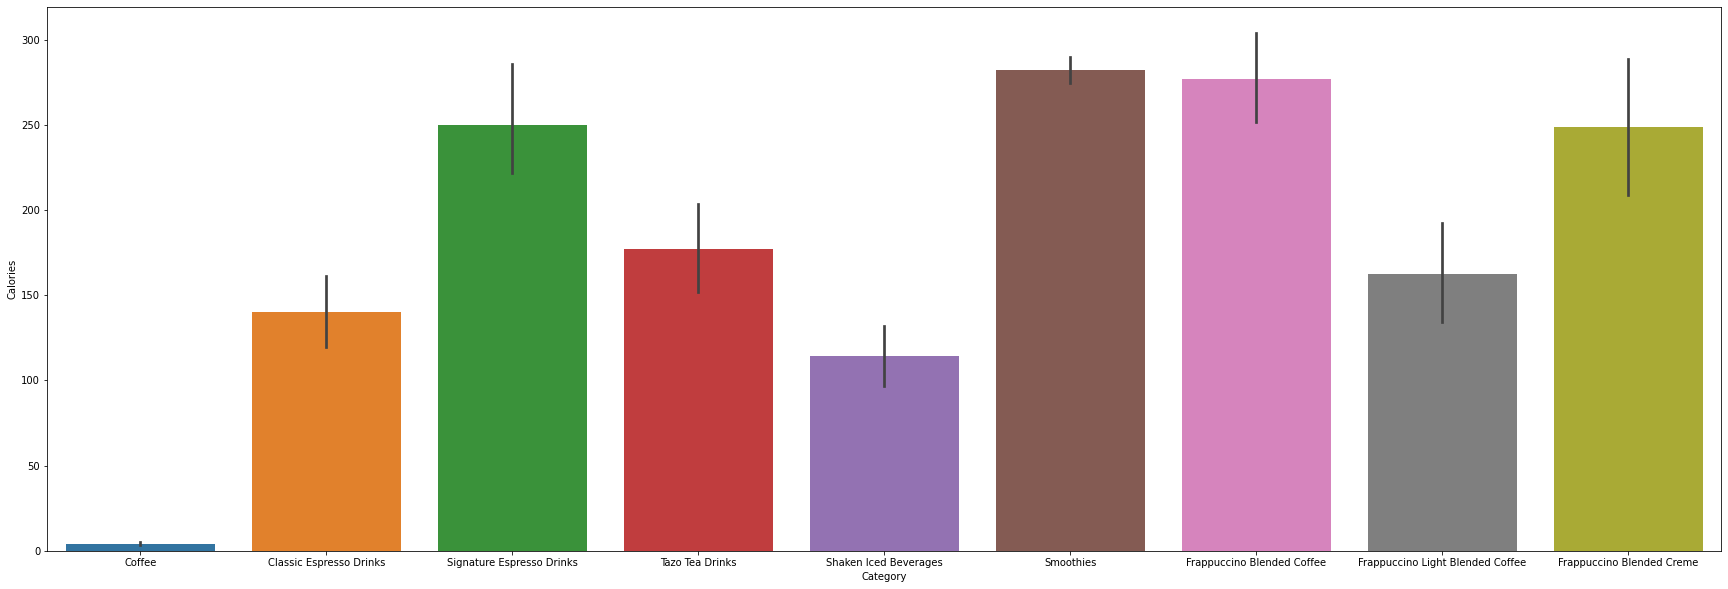

In [18]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(y= df.Calories,x = df.Category, data = df,ax= ax)


In [19]:
# A simple conclusion from this bar chart is that Smoothies, fraps, espressos have an unusally high calorie value unlike coffee with the least one


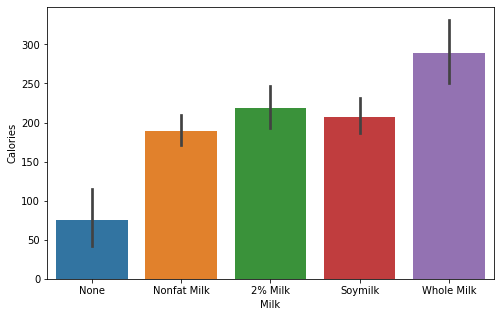

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(y= df.Calories,x = df.Milk, data = df,ax= ax)

In [21]:
#A simple conclusion from this said analysis is that no milk has the lowest calories while Whole milk has the highest

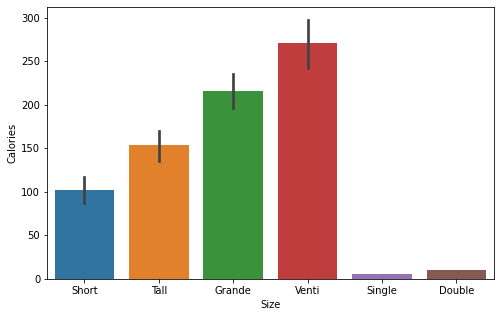

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(y= df.Calories,x = df.Size, data = df,ax= ax)

In [23]:
df.Category.value_counts()

Classic Espresso Drinks             58
Tazo Tea Drinks                     52
Signature Espresso Drinks           40
Frappuccino Blended Coffee          36
Shaken Iced Beverages               18
Frappuccino Light Blended Coffee    12
Smoothies                            9
Frappuccino Blended Creme            9
Coffee                               4
Name: Category, dtype: int64

In [24]:
df['Calorie_cat'] = np.where(df.Calories>180, 'High Calorie', 'Low Calorie')

In [25]:
df.Calorie_cat.value_counts()

High Calorie    119
Low Calorie     119
Name: Calorie_cat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


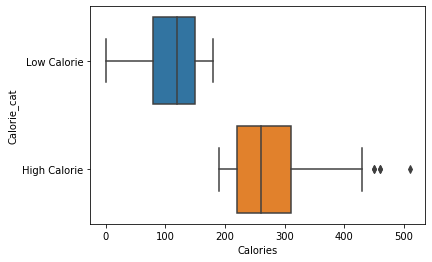

In [26]:
sns.boxplot(df.Calories,df.Calorie_cat)

In [27]:
#No very skewed and mostly normally distributed wihtout any outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


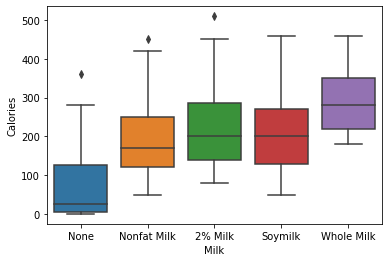

In [28]:
sns.boxplot(df.Milk,df.Calories)

In [29]:
df.corr()

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Calories,1.000000,0.636476,0.645691,0.332305,0.388229,0.796933,0.940820,0.386000,0.911007,0.581001
TotalFat,0.636476,1.000000,0.889677,0.618044,0.585912,0.460300,0.379539,0.257285,0.338384,0.549996
TransFat,0.645691,0.889677,1.000000,0.693413,0.706656,0.533636,0.445614,0.129895,0.426742,0.496012
SaturatedFat,0.332305,0.618044,0.693413,1.000000,0.920493,0.242933,0.164689,-0.094424,0.182713,0.288548
Sodium,0.388229,0.585912,0.706656,0.920493,1.000000,0.294795,0.201423,-0.061158,0.208555,0.496262
TotalCarb,0.796933,0.460300,0.533636,0.242933,0.294795,1.000000,0.765836,0.178905,0.770051,0.419695
Cholesterol,0.940820,0.379539,0.445614,0.164689,0.201423,0.765836,1.000000,0.346333,0.984227,0.365335
DietaryFibre,0.386000,0.257285,0.129895,-0.094424,-0.061158,0.178905,0.346333,1.000000,0.188848,0.539622
Sugars,0.911007,0.338384,0.426742,0.182713,0.208555,0.770051,0.984227,0.188848,1.000000,0.268728
Protein,0.581001,0.549996,0.496012,0.288548,0.496262,0.419695,0.365335,0.539622,0.268728,1.000000


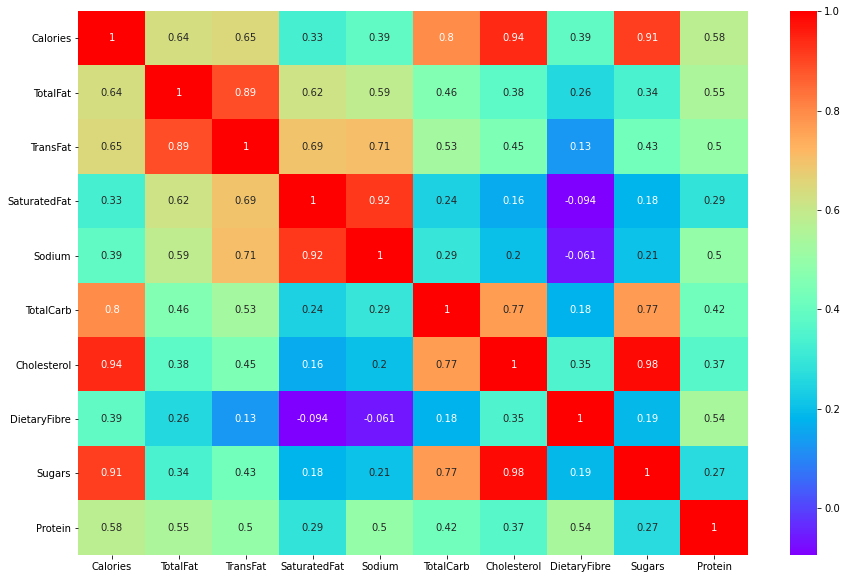

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap = 'rainbow')

In [38]:
objnames = df.dtypes[df.dtypes == 'object'].index
numnames = df.dtypes[df.dtypes!='object'].index

In [39]:
objnames

Index(['Category', 'Beverage', 'Size', 'Milk', 'Calorie_cat'], dtype='object')

In [40]:
numnames

Index(['Calories', 'TotalFat', 'TransFat', 'SaturatedFat', 'Sodium',
       'TotalCarb', 'Cholesterol', 'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

In [41]:
len(numnames)

10

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

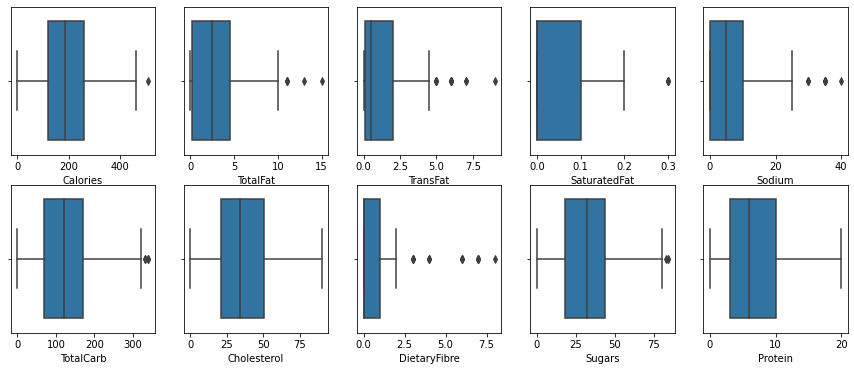

In [44]:
plt.figure(figsize =(15,6))
count = 1
for i in numnames:
  plt.subplot(2,5,count)
  sns.boxplot(df.loc[:,i])
  count = count+1


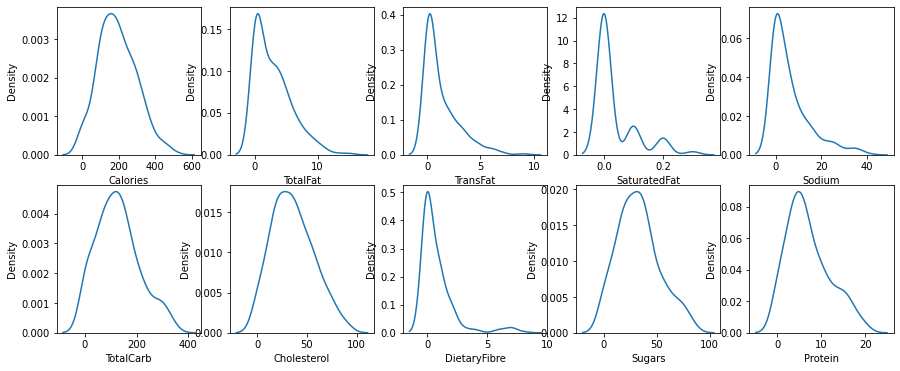

In [45]:
plt.figure(figsize =(15,6))
count = 1
for i in numnames:
  plt.subplot(2,5,count)
  sns.kdeplot(df.loc[:,i])
  count = count+1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


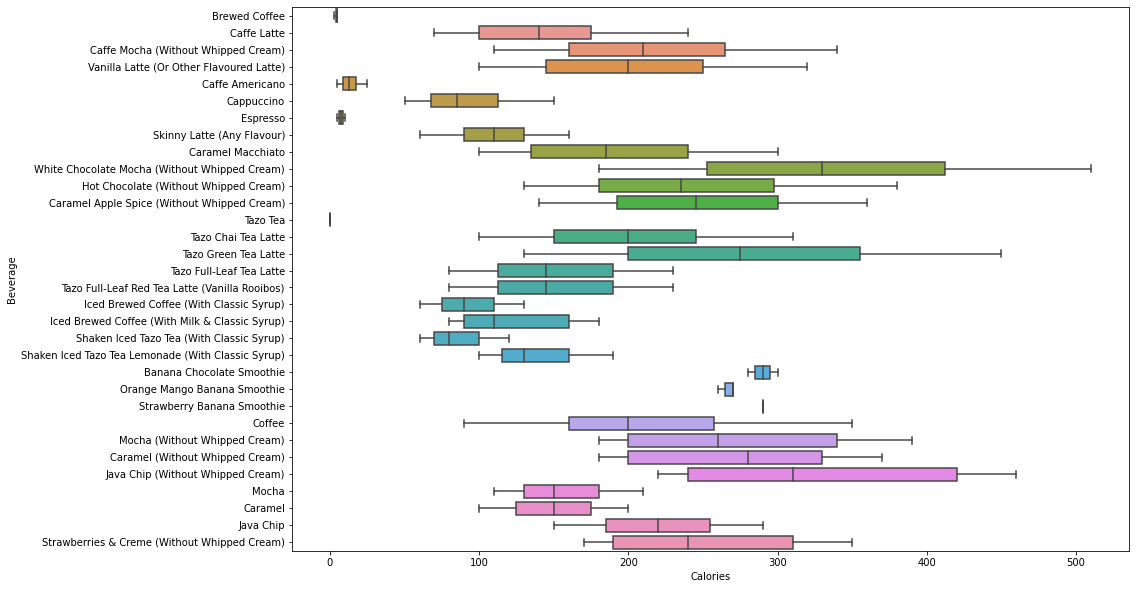

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(df.Calories,df.Beverage)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


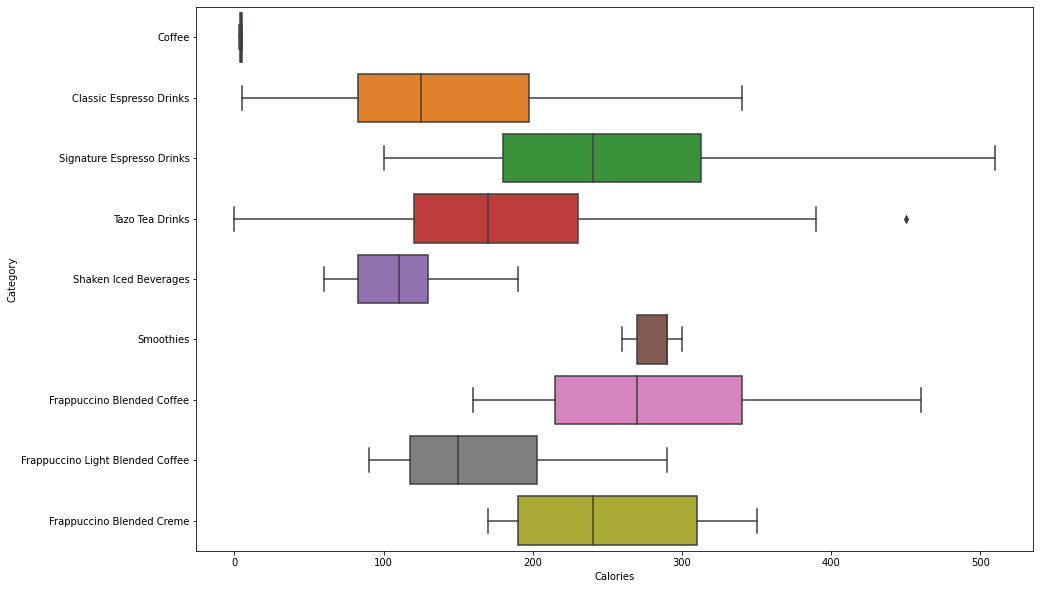

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(df.Calories,df.Category)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


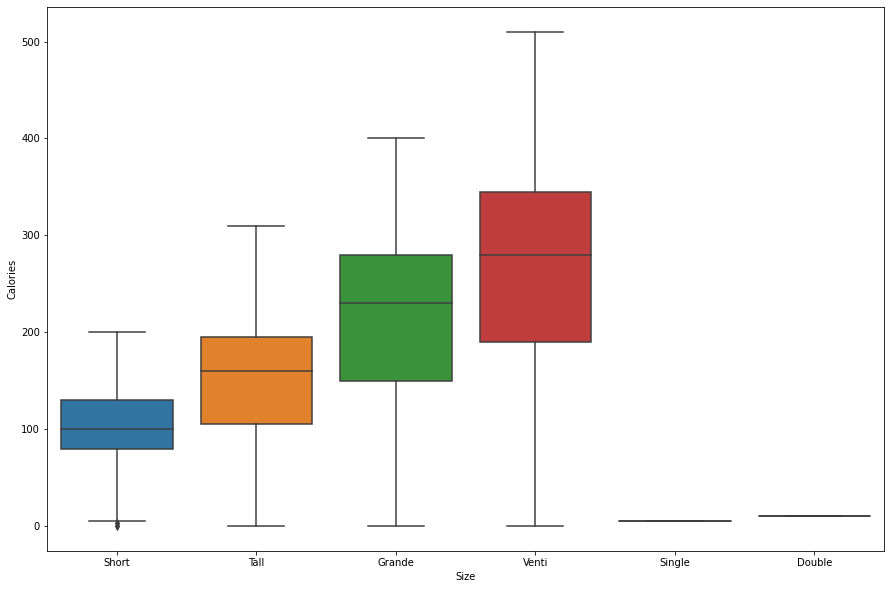

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(df.Size,df.Calories)

In [56]:
df.Size.value_counts()

Grande    72
Venti     63
Tall      63
Short     38
Double     1
Single     1
Name: Size, dtype: int64

In [55]:
df.Milk.value_counts()

Nonfat Milk    81
Soymilk        65
2% Milk        50
None           27
Whole Milk     15
Name: Milk, dtype: int64

In [58]:
df.Beverage.value_counts()

Hot Chocolate (Without Whipped Cream)                 12
Cappuccino                                            12
Caffe Latte                                           12
Tazo Chai Tea Latte                                   12
Vanilla Latte (Or Other Flavoured Latte)              12
Tazo Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
Tazo Green Tea Latte                                  12
Tazo Full-Leaf Tea Latte                              12
Caramel Macchiato                                     12
White Chocolate Mocha (Without Whipped Cream)         12
Caffe Mocha (Without Whipped Cream)                   12
Coffee                                                12
Java Chip (Without Whipped Cream)                      9
Strawberries & Creme (Without Whipped Cream)           9
Mocha (Without Whipped Cream)                          9
Caramel (Without Whipped Cream)                        9
Iced Brewed Coffee (With Milk & Classic Syrup)         9
Skinny Latte (Any Flavour)     

In [59]:
df.groupby('Category').mean().sort_values('Calories', ascending=False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [61]:
df.groupby('Category').mean().sort_values('TotalFat', ascending=False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [62]:
df.groupby('Category').mean().sort_values('Protein', ascending=False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [64]:
pd.pivot_table(data = df, values= 'Calories', index = 'Category', columns = 'Milk', aggfunc = 'mean')

Milk,2% Milk,None,Nonfat Milk,Soymilk,Whole Milk
Category,,,,,
Classic Espresso Drinks,184.375000,11.666667,134.500000,151.250000,NaN
Coffee,NaN,4.250000,NaN,NaN,NaN
Frappuccino Blended Coffee,NaN,NaN,267.500000,268.333333,295.000000
Frappuccino Blended Creme,NaN,NaN,236.666667,243.333333,266.666667
Frappuccino Light Blended Coffee,NaN,NaN,162.500000,NaN,NaN
Shaken Iced Beverages,130.000000,106.666667,116.666667,120.000000,NaN
Signature Espresso Drinks,275.833333,247.500000,233.333333,241.666667,NaN
Smoothies,286.666667,NaN,276.666667,283.333333,NaN
Tazo Tea Drinks,211.875000,0.000000,175.625000,188.750000,NaN


In [65]:
df[df.Category == 'Coffee']

,Category,Beverage,Size,Milk,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein,Calorie_cat
0,Coffee,Brewed Coffee,Short,None,3,0.1,0.0,0.0,0,5,0,0,0,0.3,Low Calorie
1,Coffee,Brewed Coffee,Tall,None,4,0.1,0.0,0.0,0,10,0,0,0,0.5,Low Calorie
2,Coffee,Brewed Coffee,Grande,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0,Low Calorie
3,Coffee,Brewed Coffee,Venti,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0,Low Calorie


**Part 2 Hypothesis Testing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


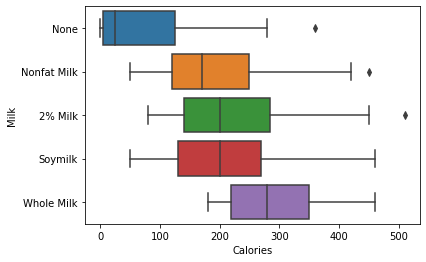

In [66]:
sns.boxplot(df.Calories, df.Milk)

In [31]:
formula = 'Calories ~C(Milk)'
model = ols(formula,df).fit()
anov_table = anova_lm(model)
print(anov_table)

             df        sum_sq        mean_sq          F        PR(>F)
C(Milk)     4.0  5.584364e+05  139609.099632  16.357517  7.975236e-12
Residual  233.0  1.988622e+06    8534.858769        NaN           NaN


In [67]:
#the difference in mean is actually true

In [70]:
dfnew = df[df.Milk != 'None']
dfnew.shape, df.shape

((211, 15), (238, 15))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


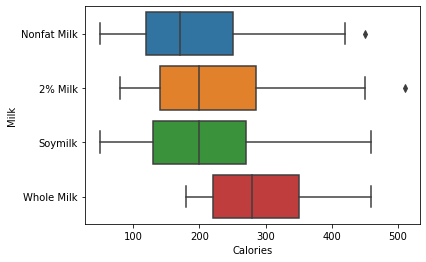

In [71]:
sns.boxplot(dfnew.Calories,dfnew.Milk)

In [72]:
formula = 'Calories ~C(Milk)'
model = ols(formula,dfnew).fit()
anov_table = anova_lm(model)
print(anov_table)

             df        sum_sq       mean_sq         F    PR(>F)
C(Milk)     3.0  1.317432e+05  43914.396571  5.184292  0.001789
Residual  207.0  1.753427e+06   8470.663896       NaN       NaN


In [73]:
#but since we removed the none factor we can see there is a significant difference 

In [74]:
res = stat()
res.tukey_hsd(dfnew,
              res_var = 'Calories',
              xfac_var = 'Milk',
              anova_model = 'Calories ~C(Milk)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Nonfat Milk,2% Milk,28.493827,-14.380041,71.367696,2.434439,0.315317
1,Nonfat Milk,Soymilk,18.186135,-21.511239,57.883509,1.678106,0.620007
2,Nonfat Milk,Whole Milk,99.827160,32.818334,166.835987,5.457045,0.001000
3,2% Milk,Soymilk,10.307692,-34.535010,55.150395,0.841997,0.900000
4,2% Milk,Whole Milk,71.333333,1.153783,141.512884,3.723255,0.044752
5,Soymilk,Whole Milk,81.641026,13.355726,149.926326,4.379475,0.011860


In [84]:
sam = res.tukey_summary

In [85]:
#any milk is better than whole milk but there is no evidence to prove that nonfat milk is any better than 2 percent or anymilk

**Linear regression**

In [86]:
df.columns

Index(['Category', 'Beverage', 'Size', 'Milk', 'Calories', 'TotalFat',
       'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol',
       'DietaryFibre', 'Sugars', 'Protein', 'Calorie_cat'],
      dtype='object')

In [89]:
formula = 'Calories ~ Category + Beverage + Size+ Milk + TotalFat + TransFat + SaturatedFat + Sodium + TotalCarb + Cholesterol + DietaryFibre + Sugars + Protein'
lm = smf.ols(formula = formula, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2673.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):          3.27e-244
Time:                        14:23:43   Log-Likelihood:                -665.69
No. Observations:                 238   AIC:                             1429.
Df Residuals:                     189   BIC:                             1600.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [92]:
formula = 'Calories ~ TotalFat + Sugars + Protein'
lm = smf.ols(formula = formula, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     9152.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):          3.42e-242
Time:                        14:28:18   Log-Likelihood:                -873.77
No. Observations:                 238   AIC:                             1756.
Df Residuals:                     234   BIC:                             1769.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7872      1.365      1.309      0.1

In [93]:
formula = 'Calories ~ TransFat + Sugars + Protein'
lm = smf.ols(formula = formula, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2820.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):          2.50e-183
Time:                        14:29:11   Log-Likelihood:                -1011.6
No. Observations:                 238   AIC:                             2031.
Df Residuals:                     234   BIC:                             2045.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1205      2.472      2.476      0.0

In [94]:
pred = lm.predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


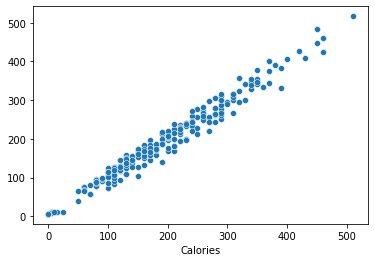

In [95]:
sns.scatterplot(df.Calories, pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


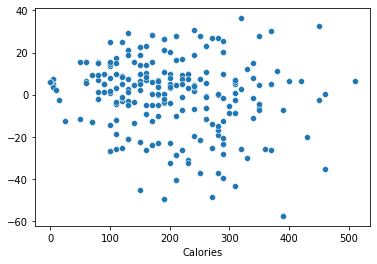

In [97]:
sns.scatterplot(df.Calories, pred-df.Calories )

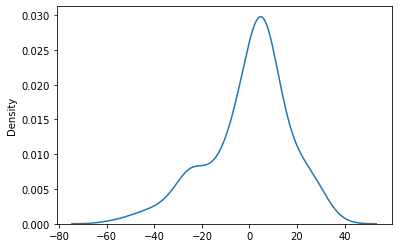

In [98]:
sns.kdeplot(pred-df.Calories)

In [109]:
formula2 = 'Calories ~  Sugars + Cholesterol + TransFat + Protein'
lm2 = smf.ols(formula = formula2, data = df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2663.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):          3.75e-193
Time:                        14:44:41   Log-Likelihood:                -984.38
No. Observations:                 238   AIC:                             1979.
Df Residuals:                     233   BIC:                             1996.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.7152      2.219      3.477      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


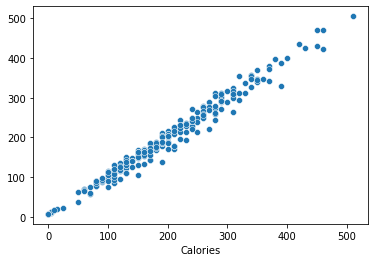

In [110]:
pred2 = lm.predict(df)
sns.scatterplot(df.Calories, pred2)

In [111]:
#The End!!